# GSEF descriptive anlaysis

In [1]:
import timeit
start_time = timeit.default_timer()

## Import libraries

In [2]:
## Import libraries
import time
import datetime
import pandas as pd
import io
import matplotlib.pyplot as plt

## Read data and reorder columns

In [3]:
gsef= pd.read_csv('gsef_output/historical_gsef.csv', parse_dates=['Date'], dayfirst=True)
gsef['month_of_year'] = pd.to_datetime(gsef['Date']).dt.month_name()
gsef['day_of_week'] = pd.to_datetime(gsef['Date']).dt.day_name()
gsef['day_number'] = pd.to_datetime(gsef['Date']).dt.day

cols = gsef.columns.tolist()

cols = cols[:1] + cols[3:6] + cols[1:3]

gsef = gsef[cols]

### Find out the average historical price

In [4]:
average_day_number = int(gsef['Close'].mean())
print("The average closing price is: {}".format(average_day_number))

The average closing price is: 238


### Group and order data by month of year

In [5]:
month_of_year= gsef.groupby(['month_of_year'])[['Close', 'pct_change']].mean()
month_of_year = month_of_year.reset_index(level=0)

month_of_year_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_of_year['month_of_year'] = pd.Categorical(month_of_year['month_of_year'], categories=month_of_year_order, ordered=True)
month_of_year = month_of_year.sort_values('month_of_year').reset_index(drop=True)
month_of_year.set_index('month_of_year', inplace=True)

In [6]:
month_of_year

,Close,pct_change
month_of_year,,
January,238.100581,0.005075
February,239.304770,-0.009493
March,240.406632,0.032328
April,243.564817,0.105297
May,243.921931,0.039306
June,234.714608,-0.039032
July,233.943874,0.033312
August,236.869583,0.004396
September,234.307484,-0.060832


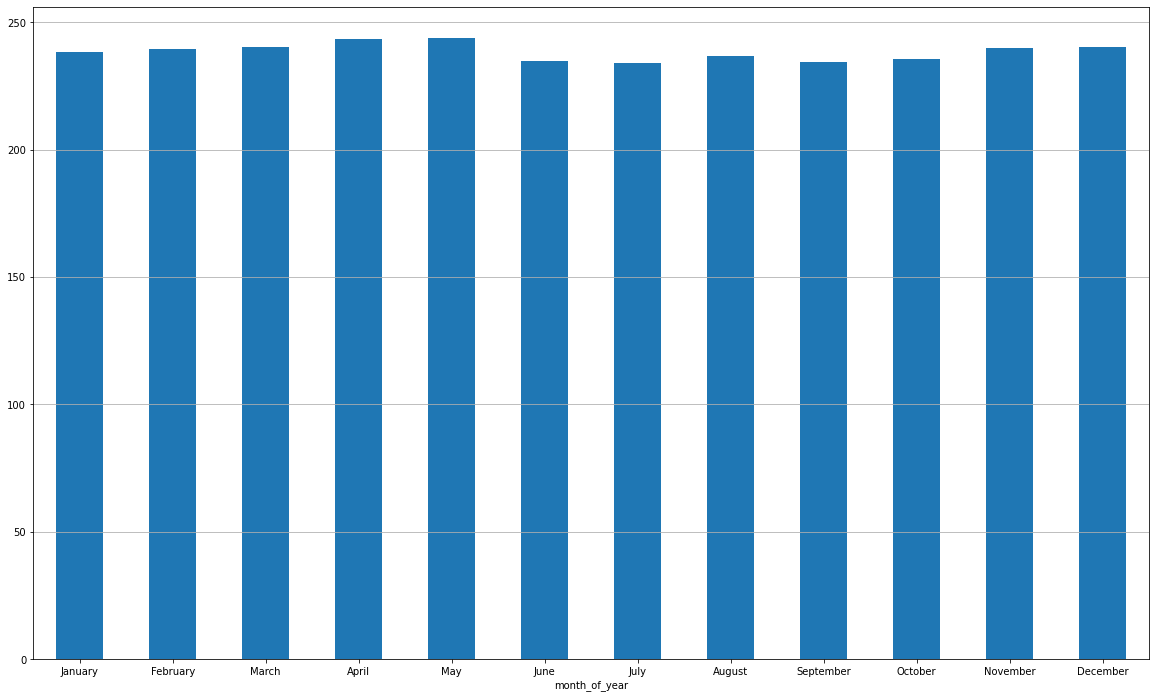

In [7]:
ax_month = month_of_year['Close'].plot.bar(rot=0, figsize=(20,12))

ax_month.grid('on', which='minor', axis='y')
ax_month.grid('off', which='major', axis='y')

### Group and order data by day of week

In [8]:
week_day= gsef.groupby(['day_of_week'])[['Close', 'pct_change']].mean()
week_day = week_day.reset_index(level=0)

day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_day['day_of_week'] = pd.Categorical(week_day['day_of_week'], categories=day_of_week_order, ordered=True)
week_day = week_day.sort_values('day_of_week').reset_index(drop=True)
week_day.set_index('day_of_week', inplace=True)

In [9]:
week_day

,Close,pct_change
day_of_week,,
Monday,235.251530,-0.029151
Tuesday,239.193707,0.071102
Wednesday,239.355561,0.032299
Thursday,239.328673,0.021453
Friday,238.578274,-0.000745


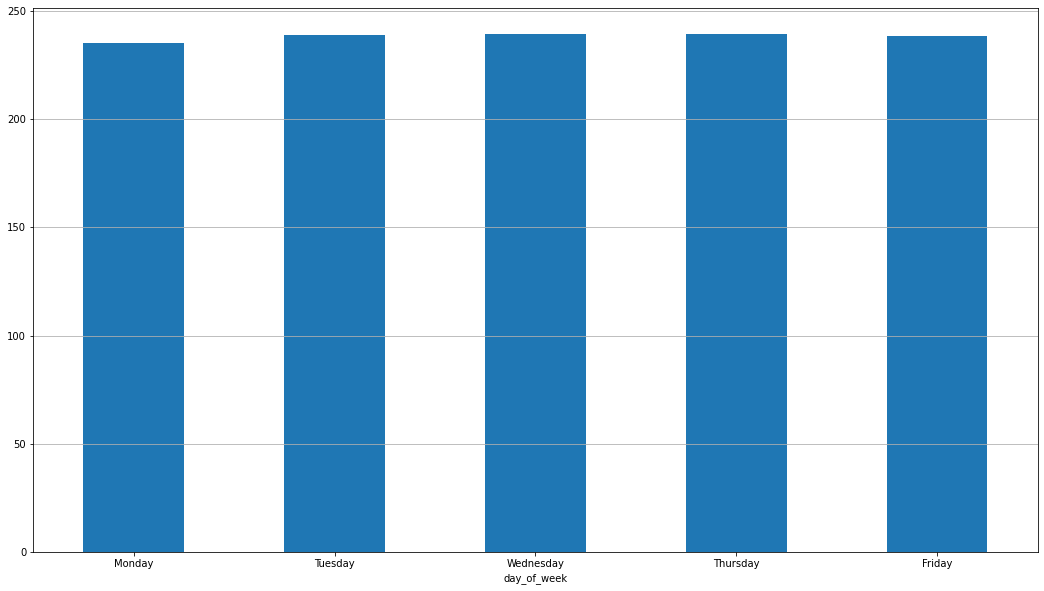

In [10]:
ax_week = week_day['Close'].plot.bar(rot=0, figsize=(18,10))

ax_week.grid('on', which='minor', axis='y')
ax_week.grid('off', which='major', axis='y')

### Group and order data by day number

In [16]:
day_number= gsef.groupby(['day_number'])[['Close', 'pct_change']].mean()
day_number = day_number.reset_index(level=0)

#day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#week_day['day_of_week'] = pd.Categorical(week_day['day_of_week'], categories=day_of_week_order, ordered=True)
day_number = day_number.sort_values('day_number').reset_index(drop=True)
day_number.set_index('day_number', inplace=True)

day_number

,Close,pct_change
day_number,,
1,242.606524,0.189146
2,236.984333,0.108889
3,237.707527,-0.069286
4,238.285055,0.083462
5,234.234751,0.088343
6,237.659171,-0.010939
7,237.651398,-0.056595
8,241.331405,0.042324
9,239.873859,-0.034891


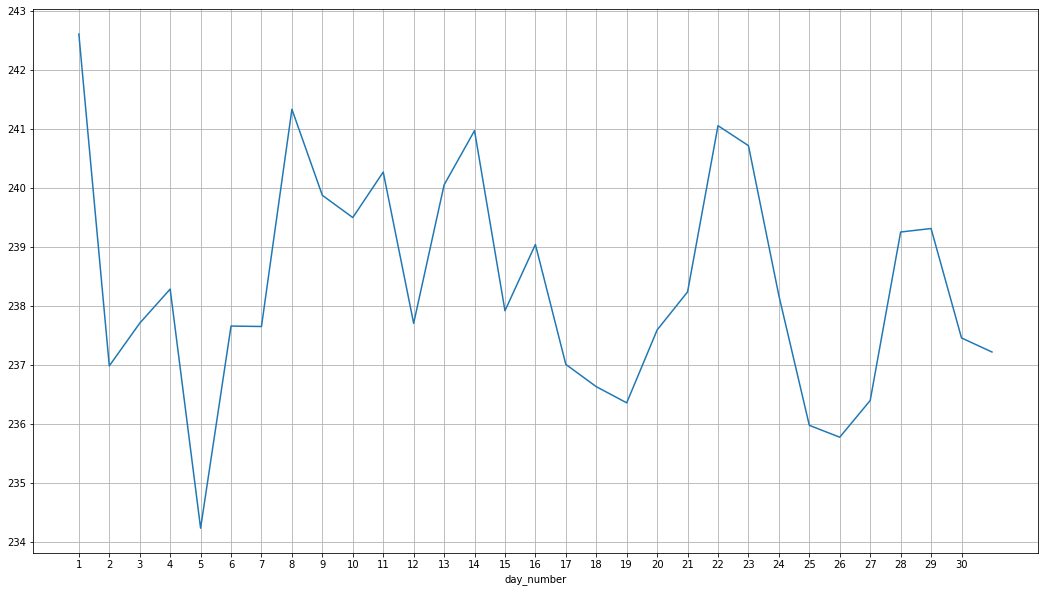

In [12]:
min_day_number = int(day_number['Close'].min())
max_day_number = int(day_number['Close'].max())

ax_day_number = day_number['Close'].plot.line(rot=0, figsize=(18,10))
plt.xticks(range(1,31))
plt.yticks(range(min_day_number,max_day_number+2))

ax_day_number.grid('on', which='minor', axis='y')
ax_day_number.grid('off', which='major', axis='y')

ax_day_number.grid('on', which='minor', axis='x')
ax_day_number.grid('off', which='major', axis='x')

## Time Elapsed

In [13]:
# Calculate and print the time elapsed to run ETL process and the date and time of the latest run
time_elapsed = timeit.default_timer() - start_time

time_elapsed_seconds = int(time_elapsed % 60)

now = datetime.datetime.now()

print("\n Success! Your GSEF descriptive anlaysis has been updated in {} seconds on {}".format(time_elapsed_seconds, now.strftime("%Y-%m-%d %H:%M:%S")))


 Success! Your GSEF descriptive anlaysis has been updated in 1 seconds on 2022-05-28 00:15:34
